File is to test the training data set without concatenating with the testing data set
Also to show the initial training data set and how its biased

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
PATH = "./dataset/customer_churn_dataset-training-master.csv"

df = pd.read_csv(PATH)
df.drop(199295, inplace=True) #drops the one null column

In [5]:
#Check for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [6]:
df.drop(columns=["CustomerID", "Gender"], inplace=True)

In [7]:
df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

In [8]:
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['Churn']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted


Churn                         1.00000
Support Calls                 0.57427
Contract Length_Monthly       0.43355
Payment Delay                 0.31213
Age                           0.21839
Last Interaction              0.14962
Subscription Type_Basic       0.02053
Subscription Type_Standard   -0.00925
Subscription Type_Premium    -0.01107
Usage Frequency              -0.04610
Tenure                       -0.05192
Contract Length_Annual       -0.17596
Contract Length_Quarterly    -0.17624
Total Spend                  -0.42935
Name: Churn, dtype: float64

In [10]:
#grabs any random sample above age 50 to show that they always churn when age is above 50
df[df['Age']>50].sample(n=10)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
2659,59.0,44.0,28.0,7.0,30.0,354.0,14.0,1.0,1,0,0,0,1,0
63076,52.0,16.0,8.0,9.0,11.0,379.0,20.0,1.0,0,1,0,1,0,0
96915,59.0,9.0,3.0,3.0,1.0,569.0,27.0,1.0,0,1,0,1,0,0
119978,57.0,32.0,26.0,8.0,25.0,221.0,3.0,1.0,0,1,0,1,0,0
243973,59.0,52.0,24.0,10.0,18.0,278.2,19.0,1.0,0,1,0,0,0,1
2219,57.0,38.0,16.0,4.0,7.0,785.0,14.0,1.0,0,1,0,1,0,0
110418,53.0,41.0,22.0,2.0,12.0,980.0,19.0,1.0,0,0,1,0,1,0
103241,51.0,35.0,10.0,2.0,7.0,462.0,2.0,1.0,0,1,0,1,0,0
84822,54.0,2.0,30.0,0.0,21.0,709.0,24.0,1.0,0,0,1,0,1,0
101433,63.0,31.0,2.0,7.0,5.0,240.0,27.0,1.0,1,0,0,0,1,0


<Axes: xlabel='Age', ylabel='Churn'>

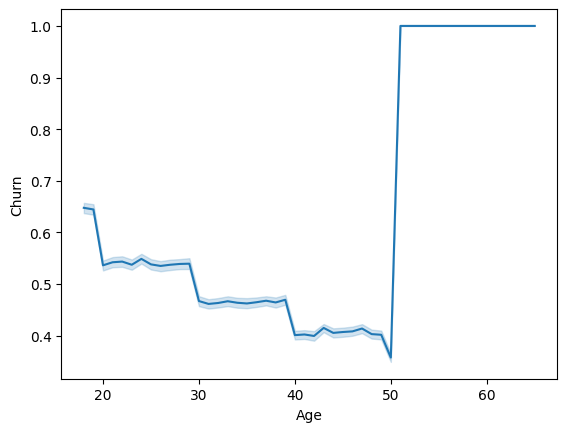

In [11]:
sns.lineplot(x=df['Age'], y=df['Churn'])
